# Dataset source: https://www.kaggle.com/omkarborikar/top-10000-popular-movies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
mov_df = pd.read_csv("Top_10000_Popular_Movies.csv")

mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   id                 10000 non-null  int64  
 2   original_language  10000 non-null  object 
 3   original_title     10000 non-null  object 
 4   popularity         10000 non-null  float64
 5   release_date       9960 non-null   object 
 6   vote_average       10000 non-null  float64
 7   vote_count         10000 non-null  int64  
 8   genre              10000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 703.2+ KB


In [3]:
mov_df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
mov_df.describe()

,id,popularity,vote_average,vote_count
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,252337.58590,34.984327,6.300120,1304.033700
std,262027.02199,130.544472,1.463785,2487.256212
min,5.00000,5.840000,0.000000,0.000000
25%,11638.75000,11.772750,5.900000,109.000000
50%,150207.50000,15.972000,6.500000,433.000000
75%,456957.00000,27.480500,7.100000,1282.000000
max,884239.00000,8222.616000,10.000000,30043.000000


In [5]:
mov_df.head()

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
0,580489,en,Venom: Let There Be Carnage,8222.616,2021-09-30,7.0,828,"['Science Fiction', 'Action']"
1,335983,en,Venom,3012.242,2018-09-28,6.8,11846,"['Science Fiction', 'Action']"
2,550988,en,Free Guy,3864.616,2021-08-11,7.8,2908,"['Comedy', 'Action', 'Adventure', 'Science Fic..."
3,772436,es,"Matando Cabos 2, La Máscara del Máscara",2556.789,2021-10-01,7.7,34,"['Action', 'Comedy', 'Adventure']"
4,568620,en,Snake Eyes: G.I. Joe Origins,2164.071,2021-07-22,6.9,685,"['Action', 'Adventure']"


In [6]:
mov_df.tail()

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
9995,34653,en,A Single Man,11.647,2009-10-19,7.3,1209,"['Romance', 'Drama']"
9996,33518,en,Alligator,9.894,1980-07-02,5.8,182,"['Horror', 'Science Fiction', 'Thriller']"
9997,26320,en,Taking Woodstock,9.197,2009-08-26,6.2,321,"['Music', 'Comedy', 'Drama']"
9998,287318,en,3 Scream Queens,7.350,2014-11-25,5.2,5,['Horror']
9999,66664,it,Terminator II,9.624,1989-08-22,4.9,31,"['Action', 'Science Fiction', 'Horror']"


In [7]:
mov_df["original_language"].value_counts().head()

en    7761
ja     594
es     460
fr     298
ko     154
Name: original_language, dtype: int64

In [8]:
mov_df["original_language"].value_counts().tail()

la    1
uk    1
ca    1
bn    1
ku    1
Name: original_language, dtype: int64

In [9]:
mov_df["original_title"].value_counts()

Venom                  5
Les Misérables         3
The Little Mermaid     3
Carrie                 3
Porno                  3
                      ..
All My Life            1
Extraterrestre         1
American Hustle        1
Blood of Redemption    1
Terminator II          1
Name: original_title, Length: 9768, dtype: int64

In [10]:
mov_df["original_title"].value_counts().head()

Venom                 5
Les Misérables        3
The Little Mermaid    3
Carrie                3
Porno                 3
Name: original_title, dtype: int64

In [11]:
mov_df["original_title"].value_counts().tail()

All My Life            1
Extraterrestre         1
American Hustle        1
Blood of Redemption    1
Terminator II          1
Name: original_title, dtype: int64

In [12]:
mov_df["release_date"].value_counts()

2021-10-21    39
2021-10-15    25
2021-10-20    24
2021-10-08    20
2021-10-22    17
              ..
2000-10-17     1
2000-03-02     1
2008-09-30     1
2016-05-19     1
1989-08-22     1
Name: release_date, Length: 5668, dtype: int64

In [13]:
mov_df["release_date"].value_counts().head()

2021-10-21    39
2021-10-15    25
2021-10-20    24
2021-10-08    20
2021-10-22    17
Name: release_date, dtype: int64

In [14]:
mov_df["release_date"].value_counts().tail()

2000-10-17    1
2000-03-02    1
2008-09-30    1
2016-05-19    1
1989-08-22    1
Name: release_date, dtype: int64

In [15]:
mov_df["popularity"].max()

8222.616

In [16]:
mov_df["popularity"].min()

5.84

In [17]:
mov_df["popularity"].mean()

34.9843265

In [18]:
max_id = mov_df["popularity"].idxmax()

mov_df.loc[max_id]

id                                          580489
original_language                               en
original_title         Venom: Let There Be Carnage
popularity                                8222.616
release_date                            2021-09-30
vote_average                                   7.0
vote_count                                     828
genre                ['Science Fiction', 'Action']
Name: 0, dtype: object

In [19]:
min_id = mov_df["popularity"].idxmin()

mov_df.loc[min_id]

id                                 26291
original_language                     en
original_title          Shakes the Clown
popularity                          5.84
release_date                  1991-08-28
vote_average                         5.6
vote_count                            50
genre                ['Comedy', 'Crime']
Name: 9854, dtype: object

In [20]:
mov_df[mov_df["vote_average"] == 10.0].head()

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
505,875828,en,Untitled Peaky Blinders Film,98.046,NaN,10.0,2,[]
4354,584948,es,Eyes of Desire,15.329,1998-09-01,10.0,1,[]
4964,794819,hi,रश्मि रॉकेट,13.048,2021-10-15,10.0,1,['Drama']
5473,882251,en,Silent Hours,15.822,2021-10-07,10.0,1,['Thriller']
6738,856577,ja,ソードアート・オンライン Extra Edition,9.533,2013-12-31,10.0,1,['Animation']


In [21]:
mov_df[mov_df["vote_average"] == 0.0].head()

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
117,585083,en,Hotel Transylvania: Transformania,273.981,2022-01-14,0.0,0,"['Family', 'Animation', 'Fantasy', 'Comedy', '..."
121,634649,en,Spider-Man: No Way Home,273.680,2021-12-15,0.0,0,"['Science Fiction', 'Action', 'Adventure', 'Fa..."
161,385687,en,Fast & Furious 10,194.837,2023-04-06,0.0,0,"['Action', 'Crime']"
172,524434,en,Eternals,292.382,2021-11-03,0.0,0,"['Science Fiction', 'Action', 'Adventure', 'Dr..."
225,763873,en,Under Wraps,255.892,2021-10-30,0.0,0,"['Comedy', 'Family']"


In [22]:
mov_df.corr()

,id,popularity,vote_average,vote_count
id,1.000000,0.121851,-0.247567,-0.237103
popularity,0.121851,1.000000,0.045352,0.088182
vote_average,-0.247567,0.045352,1.000000,0.240653
vote_count,-0.237103,0.088182,0.240653,1.000000


In [23]:
mov_df["genre"].value_counts().head()

['Drama']                 521
['Comedy']                456
['Horror']                264
['Documentary']           228
['Horror', 'Thriller']    218
Name: genre, dtype: int64

In [24]:
mov_df["genre"].value_counts().tail()

['Action', 'Adventure', 'Fantasy', 'TV Movie']                          1
['Animation', 'Family', 'Fantasy', 'Adventure', 'Comedy', 'Romance']    1
['Adventure', 'Horror', 'Comedy']                                       1
['Comedy', 'Adventure', 'Fantasy', 'Animation', 'Family']               1
['Comedy', 'Romance', 'TV Movie', 'Drama']                              1
Name: genre, dtype: int64

In [25]:
mov_df[["genre", "popularity"]].head()

,genre,popularity
0,"['Science Fiction', 'Action']",8222.616
1,"['Science Fiction', 'Action']",3012.242
2,"['Comedy', 'Action', 'Adventure', 'Science Fic...",3864.616
3,"['Action', 'Comedy', 'Adventure']",2556.789
4,"['Action', 'Adventure']",2164.071


In [26]:
mov_df[["genre", "popularity"]].tail()

,genre,popularity
9995,"['Romance', 'Drama']",11.647
9996,"['Horror', 'Science Fiction', 'Thriller']",9.894
9997,"['Music', 'Comedy', 'Drama']",9.197
9998,['Horror'],7.350
9999,"['Action', 'Science Fiction', 'Horror']",9.624


In [27]:
mov_df[["original_title", "vote_count"]]

,original_title,vote_count
0,Venom: Let There Be Carnage,828
1,Venom,11846
2,Free Guy,2908
3,"Matando Cabos 2, La Máscara del Máscara",34
4,Snake Eyes: G.I. Joe Origins,685
...,...,...
9995,A Single Man,1209
9996,Alligator,182
9997,Taking Woodstock,321
9998,3 Scream Queens,5


In [28]:
num_of_genres = mov_df["genre"].value_counts().nunique()

print(f"There are {num_of_genres} unique genres.")

There are 65 unique genres.


In [29]:
num_of_titles = mov_df["original_title"].nunique()

print(f"There are {num_of_titles} unique film titles.")

There are 9768 unique film titles.


<AxesSubplot:xlabel='vote_average', ylabel='Count'>

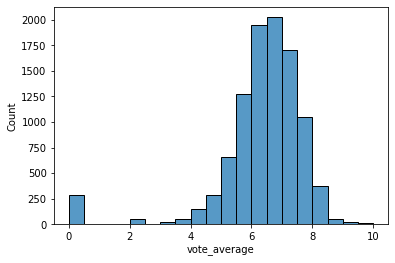

In [30]:
sns.histplot(data=mov_df, x="vote_average", bins=20)

# Simple Recommender 

#### This section includes code that presents nth most popular (or least popular) movies based on scores assigned to each movie in the dataset, given the following formula:

###### WeightedRating(WR) = (v/v + m * R) + (m/v + m * C)

###### v = number of votes for the movie
###### m = minimum votes required to to be listed in the chart
###### R = average rating of the movie
###### C = mean vote across the whole report

# Source for this formula: https://www.datacamp.com/community/tutorials/recommender-systems-python

In [31]:
C = mov_df["vote_average"].mean()
C

6.30012

In [32]:
m = mov_df["vote_count"].quantile(0.90)
m

3416.2000000000007

In [33]:
mov_scored = mov_df.copy().loc[mov_df["vote_count"] >= m]
mov_scored.shape

(1000, 8)

In [34]:
def weighted_rating(x, m=m, C=C):
    v = x["vote_count"]
    R = x["vote_average"]
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [35]:
mov_scored["score"] = mov_scored.apply(weighted_rating, axis=1)

In [36]:
mov_scored = mov_scored.sort_values("score", ascending=False)

In [37]:
mov_scored[["original_title", "vote_count", "vote_average", "score"]].head(10)

,original_title,vote_count,vote_average,score
937,The Shawshank Redemption,19908,8.7,8.348499
777,The Godfather,14928,8.7,8.253076
1037,The Dark Knight,26004,8.5,8.244555
1333,Pulp Fiction,21922,8.5,8.203403
1374,Forrest Gump,21403,8.5,8.197201
636,The Lord of the Rings: The Return of the King,18429,8.5,8.155978
1217,Fight Club,22613,8.4,8.124401
242,Inception,30043,8.3,8.095811
602,The Lord of the Rings: The Fellowship of the Ring,19849,8.4,8.091659
1991,Schindler's List,11931,8.6,8.088060


In [38]:
mov_scored[["original_title", "vote_count", "vote_average", "score"]].tail(10)

,original_title,vote_count,vote_average,score
1002,Ghostbusters,5166,5.4,5.758299
824,Jupiter Ascending,5639,5.4,5.739583
2841,Daredevil,3948,5.2,5.710338
1898,Assassin's Creed,6522,5.4,5.709411
848,A Good Day to Die Hard,5335,5.3,5.690416
1011,Independence Day: Resurgence,5027,5.2,5.645119
992,After Earth,5561,5.2,5.618642
432,Green Lantern,5874,5.2,5.604537
2763,Batman & Robin,3863,4.3,5.238676
931,Fantastic Four,4919,4.4,5.178768
